# Mutualism breakdown underpins evolutionary rescue in an obligate cross-feeding bacterial consortium

Ignacio J. Melero-Jiménez¹²³\*, Yael Sorokin¹, Ami Merlin¹, Jiawei Li¹, Alejandro Couce³\*† and Jonathan Friedman¹\*†  

¹ Institute of Environmental Sciences, The Hebrew University of Jerusalem, Rehovot, Israel  
² Universidad de Málaga, Andalucía Tech, Departamento de Botánica y Fisiología Vegetal, Campus de Teatinos, 29010, Málaga, Spain  
³ Centro de Biotecnología y Genómica de Plantas, Universidad Politécnica de Madrid (UPM), 28223 Madrid, Spain  

\*Corresponding author. Email: [imelero@uma.es](mailto:imelero@uma.es) (I.J.M.J); [a.couce@upm.es](mailto:a.couce@upm.es) (A.C.); [jonathan.friedman@mail.huji.ac.il](mailto:jonathan.friedman@mail.huji.ac.il) (J.F.)  

\*† These authors contributed equally to this work.


## Imports

In [3]:
##Libraries
import pandas as pd
import math
import sys
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
from itertools import product
import scipy.optimize as optimize
from sklearn.metrics import r2_score
import os
from datetime import timedelta, datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors


In [4]:
# Get the current working directory
base_directory = os.getcwd()

# Get the current working directory
base_directory = os.path.join(os.getcwd(), "Data_R")  # This will create a relative path to the "Data" folder

# Figure S2. Auxotrophic strains are unaffected by stress when supplemented with amino acids.

### Figure S2. a) Population dynamics of the obligate mutualism consortium (green) and auxotrophic strains I and M (blue and yellow, respectively). The pink background indicates exposure to salinity. The experiment consisted of 96 independent populations for each treatment. The media was supplemented with 100 µM of isoleucine or methionine, respectively

In [5]:
# Relative paths to the files
file1_T1 = os.path.join(base_directory, "Evolutionary experiment", "T1", "P1.CSV")
file2_T1 = os.path.join(base_directory, "Evolutionary experiment", "T1", "P2.CSV")
file3_T1 = os.path.join(base_directory, "Evolutionary experiment", "T1", "P3.CSV")
file4_T1 = os.path.join(base_directory,  "Evolutionary experiment", "T1", "P4.CSV")
file5_T1 = os.path.join(base_directory,  "Evolutionary experiment", "T1", "P5.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_5 = pd.read_csv(file5_T1, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="1" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="0" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T1=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="1" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="0" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T1=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="1" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="0" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T1=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="1" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="0" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T1=P4

In [6]:
# Relative paths to the files
file1_T2 = os.path.join(base_directory, "Evolutionary experiment", "T2", "P1.CSV")
file2_T2 = os.path.join(base_directory, "Evolutionary experiment", "T2", "P2.CSV")
file3_T2 = os.path.join(base_directory, "Evolutionary experiment", "T2", "P3.CSV")
file4_T2 = os.path.join(base_directory,  "Evolutionary experiment", "T2", "P4.CSV")
file5_T2 = os.path.join(base_directory,  "Evolutionary experiment", "T2", "P5.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T2, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T2, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T2, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T2, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_5 = pd.read_csv(file5_T2, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="2" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="0" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T2=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="2" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="0" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T2=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="2" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="0" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T2=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="2" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="0" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T2=P4

In [7]:
# Relative paths to the files
file1_T3 = os.path.join(base_directory, "Evolutionary experiment", "T3", "P1.CSV")
file2_T3 = os.path.join(base_directory, "Evolutionary experiment", "T3", "P2.CSV")
file3_T3 = os.path.join(base_directory, "Evolutionary experiment", "T3", "P3.CSV")
file4_T3 = os.path.join(base_directory,  "Evolutionary experiment", "T3", "P4.CSV")
file5_T3 = os.path.join(base_directory,  "Evolutionary experiment", "T3", "P5.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T3, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T3, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T3, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T3, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_5 = pd.read_csv(file5_T3, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="3" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="0" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T3=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="3" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="0" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T3=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="3" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="0" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T3=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="3" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="0" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T3=P4

In [8]:
# Relative paths to the files
file1_T4 = os.path.join(base_directory, "Evolutionary experiment", "T4", "P1.CSV")
file2_T4 = os.path.join(base_directory, "Evolutionary experiment", "T4", "P2.CSV")
file3_T4 = os.path.join(base_directory, "Evolutionary experiment", "T4", "P3.CSV")
file4_T4 = os.path.join(base_directory,  "Evolutionary experiment", "T4", "P4.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T4, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T4, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T4, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T4, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})

#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="4" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="3" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T4=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="4" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="3" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T4=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="4" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="3" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T4=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="4" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="3" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T4=P4


In [9]:
# Relative paths to the files
file1_T5 = os.path.join(base_directory, "Evolutionary experiment", "T5", "P1.CSV")
file2_T5 = os.path.join(base_directory, "Evolutionary experiment", "T5", "P2.CSV")
file3_T5 = os.path.join(base_directory, "Evolutionary experiment", "T5", "P3.CSV")
file4_T5 = os.path.join(base_directory,  "Evolutionary experiment", "T5", "P4.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T5, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T5, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T5, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T5, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="5" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="3" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T5=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="5" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="3" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T5=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="5" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="3" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T5=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="5" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="3" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T5=P4

In [10]:
# Relative paths to the files
file1_T6 = os.path.join(base_directory, "Evolutionary experiment", "T6", "P1.CSV")
file2_T6 = os.path.join(base_directory, "Evolutionary experiment", "T6", "P2.CSV")
file3_T6 = os.path.join(base_directory, "Evolutionary experiment", "T6", "P3.CSV")
file4_T6 = os.path.join(base_directory,  "Evolutionary experiment", "T6", "P4.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T6, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T6, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T6, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T6, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="6" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="3" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T6=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="6" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="3" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T6=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="6" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="3" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T6=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="6" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="3" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T6=P4

In [11]:
# Relative paths to the files
file1_T7 = os.path.join(base_directory, "Evolutionary experiment", "T7", "P1.CSV")
file2_T7 = os.path.join(base_directory, "Evolutionary experiment", "T7", "P2.CSV")
file3_T7 = os.path.join(base_directory, "Evolutionary experiment", "T7", "P3.CSV")
file4_T7 = os.path.join(base_directory,  "Evolutionary experiment", "T7", "P4.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T7, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T7, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T7, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T7, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="7" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="3" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T7=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="7" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="3" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T7=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="7" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="3" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T7=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="7" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="3" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T7=P4

In [12]:
# Relative paths to the files
file1_T8 = os.path.join(base_directory, "Evolutionary experiment", "T8", "P1.CSV")
file2_T8 = os.path.join(base_directory, "Evolutionary experiment", "T8", "P2.CSV")
file3_T8 = os.path.join(base_directory, "Evolutionary experiment", "T8", "P3.CSV")
file4_T8 = os.path.join(base_directory,  "Evolutionary experiment", "T8", "P4.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T8, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T8, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T8, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T8, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="8" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="3" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T8=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="8" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="3" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T8=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="8" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="3" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T8=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="8" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="3" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T8=P4


In [13]:
# Relative paths to the files
file1_T9 = os.path.join(base_directory, "Evolutionary experiment", "T9", "P1.CSV")
file2_T9 = os.path.join(base_directory, "Evolutionary experiment", "T9", "P2.CSV")
file3_T9 = os.path.join(base_directory, "Evolutionary experiment", "T9", "P3.CSV")
file4_T9 = os.path.join(base_directory,  "Evolutionary experiment", "T9", "P4.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T9, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T9, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T9, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T9, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})


#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="9" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="3" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T9=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="9" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="3" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T9=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="9" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="3" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T9=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="9" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="3" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T9=P4


In [14]:
# Relative paths to the files
file1_T10 = os.path.join(base_directory, "Evolutionary experiment", "T10", "P1.CSV")
file2_T10= os.path.join(base_directory, "Evolutionary experiment", "T10", "P2.CSV")
file3_T10 = os.path.join(base_directory, "Evolutionary experiment", "T10", "P3.CSV")
file4_T10 = os.path.join(base_directory,  "Evolutionary experiment", "T10", "P4.CSV")


#useful colums
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
Plate_1 = pd.read_csv(file1_T10, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_2 = pd.read_csv(file2_T10, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_3 = pd.read_csv(file3_T10, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})
Plate_4 = pd.read_csv(file4_T10, skiprows=7, usecols=cols).loc[0:8].rename(columns={'Unnamed: 1': 'row'})

#-------------------------------------------------------------------------------------------------------------------------------------
#Plate 1
P1=Plate_1.melt(id_vars='row')
P1['variable']=P1['variable'].astype(str)
P1['well']=P1['row']+P1['variable'] #well name
P1['Specie']="E. coli" #Specie
P1['Strain']="(I)" #Strain combination
P1['Time point']="10" #Time point (Transference)
P1['Amino Acids content']="Yes" #Amino Acids content
P1['Culture condition']="Mono-culture" #Mono or co culture
P1['Interaction']="no interaction"
P1['Salinity']="3" #salinity
P1["OD600"] = P1["value"] - 0.04
P1_T10=P1

#Plate 2
P2=Plate_2.melt(id_vars='row')
P2['variable']=P2['variable'].astype(str)
P2['well']=P2['row']+P2['variable'] #well name
P2['Specie']="E. coli" #Specie
P2['Strain']="(M)" #Strain combination
P2['Time point']="10" #Time point (Transference)
P2['Amino Acids content']="Yes" #Amino Acids content
P2['Culture condition']="Mono-culture" #Mono or co culture
P2['Interaction']="no interaction"
P2['Salinity']="3" #salinity
P2["OD600"] = P2["value"] - 0.04
P2_T10=P2

#Plate 3
P3=Plate_3.melt(id_vars='row')
P3['variable']=P3['variable'].astype(str)
P3['well']=P3['row']+P3['variable'] #well name
P3['Specie']="E. coli" #Specie
P3['Strain']="(I)-(M)" #Strain combination
P3['Time point']="10" #Time point (Transference)
P3['Amino Acids content']="Yes" #Amino Acids content
P3['Culture condition']="Co-culture" #Mono or co culture
P3['Interaction']="Competition"
P3['Salinity']="3" #salinity
P3["OD600"] = P3["value"] - 0.04
P3_T10=P3

#Plate 4
P4=Plate_4.melt(id_vars='row')
P4['variable']=P4['variable'].astype(str)
P4['well']=P4['row']+P4['variable'] #well name
P4['Specie']="E. coli" #Specie
P4['Strain']="(I)+(M)" #Strain combination
P4['Time point']="10" #Time point (Transference)
P4['Amino Acids content']="No" #Amino Acids content
P4['Culture condition']="Co-culture" #Mono or co culture
P4['Interaction']="Mutualism"
P4['Salinity']="3" #salinity
P4["OD600"] = P4["value"] - 0.04
P4_T10=P4

In [15]:
df = pd.concat([P1_T1,P2_T1,P3_T1,P4_T1,
                P1_T2,P2_T2,P3_T2,P4_T2,
                P1_T3,P2_T3,P3_T3,P4_T3,
                P1_T4,P2_T4,P3_T4,P4_T4,
                P1_T5,P2_T5,P3_T5,P4_T5,
                P1_T6,P2_T6,P3_T6,P4_T6,
                P1_T7,P2_T7,P3_T7,P4_T7,
                P1_T8,P2_T8,P3_T8,P4_T8,
                P1_T9,P2_T9,P3_T9,P4_T9,
                P1_T10,P2_T10,P3_T10,P4_T10,])

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/3813582738.py:13: UserWarning: 
The palette list has fewer values (1) than needed (96) and will cycle, which may produce an uninterpretable plot.
  sns.pointplot(x="Time point", y="OD600", hue="well", palette=["#2E8B57"], data=Fig2_mutualism, ax=axes[0], markersize=8, alpha=0.5, linewidth=0.5)  # Green, thinner lines
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/3813582738.py:39: UserWarning: 
The palette list has fewer values (1) than needed (96) and will cycle, which may produce an uninterpretable plot.
  sns.pointplot(x="Time point", y="OD600", hue="well", palette=["#1f77b4"], data=Fig2_monoculture_I, ax=axes[1], markersize=8, alpha=0.5, linewidth=0.5)  # Blue, thinner lines
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/3813582738.py:56: UserWarning: 
The palette list has fewer values (1) than needed (96) and will cycle, which may produce an uninterpretable plot.
  sns.pointplot(x=

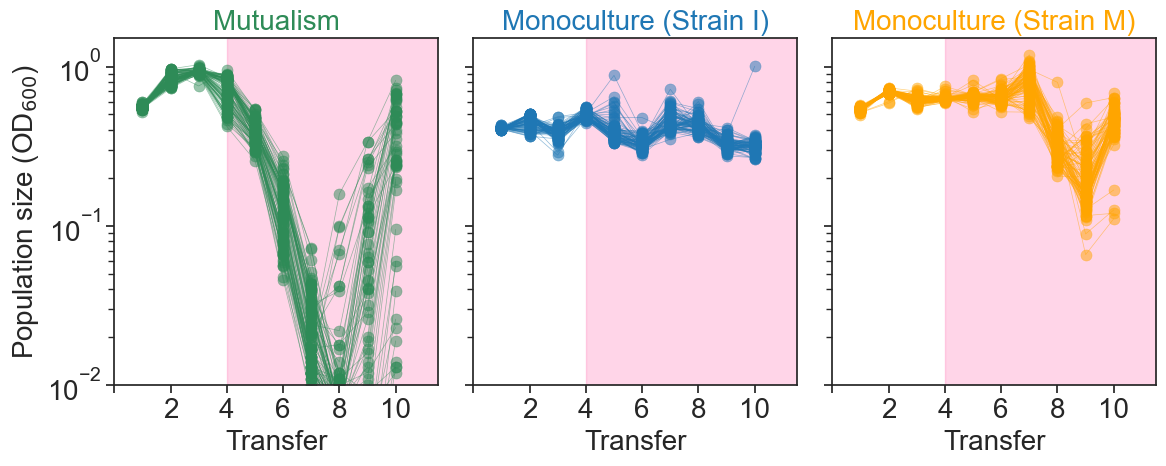

In [16]:
# Increase font size and set style
sns.set(font_scale=1.5, style='ticks')

# Create a grid of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)  # Share the y-axis

# First Plot - Mutualism
Fig2_mutualism = df[df["Culture condition"].isin(["Co-culture"]) & df["Amino Acids content"].isin(["No"])]
Fig2_mutualism = Fig2_mutualism.copy()
Fig2_mutualism.loc[Fig2_mutualism["OD600"] <= 0, "OD600"] = 0.001

# Create a pointplot on the first subplot
sns.pointplot(x="Time point", y="OD600", hue="well", palette=["#2E8B57"], data=Fig2_mutualism, ax=axes[0], markersize=8, alpha=0.5, linewidth=0.5)  # Green, thinner lines
axes[0].set_yscale("log")
axes[0].set_ylabel("Population size (OD$_{600}$)", fontsize=20)
axes[0].set_xlabel("Transfer", fontsize=20)
axes[0].axvspan(xmin=3, xmax=14.5, color='#FF5AA4', alpha=0.25)  # Colorblind-friendly pink background
axes[0].set_xlim(0.5, 10.5)
axes[0].set_xticks([-1, 1, 3, 5, 7, 9])
axes[0].set_ylim(0.001, 1)
axes[0].legend([], [], frameon=False)
plt.setp(axes[0].collections, alpha=0.7)  # Transparent markers
axes[0].set_title("Mutualism", fontsize=20, color="#2E8B57")

# Second Plot - Monoculture (Strain (I))
# Convert "Time point" to numeric to ensure compatibility with comparisons
df["Time point"] = pd.to_numeric(df["Time point"], errors='coerce')

# Filter to exclude OD600 < 0.01 from transfer 3 onwards
Fig2_monoculture_I = df[
    (df["Culture condition"].isin(["Mono-culture"])) &
    (df["Strain"].isin(["(I)"])) &
    ~((df["Time point"] >= 3) & (df["OD600"] < 0.01))
]
Fig2_monoculture_I = Fig2_monoculture_I.copy()
Fig2_monoculture_I.loc[Fig2_monoculture_I["OD600"] <= 0, "OD600"] = 0.001

# Create a pointplot on the second subplot
sns.pointplot(x="Time point", y="OD600", hue="well", palette=["#1f77b4"], data=Fig2_monoculture_I, ax=axes[1], markersize=8, alpha=0.5, linewidth=0.5)  # Blue, thinner lines
axes[1].set_yscale("log")
axes[1].set_ylabel("", fontsize=20)
axes[1].set_xlabel("Transfer", fontsize=20)
axes[1].axvspan(xmin=3, xmax=14.5, color='#FF5AA4', alpha=0.25)  # Colorblind-friendly pink background
axes[1].set_xlim(0.5, 10.5)
axes[1].set_xticks([-1, 1, 3, 5, 7, 9])
axes[1].set_ylim(0.001, 1)
axes[1].legend([], [], frameon=False)
plt.setp(axes[1].collections, alpha=0.7)  # Transparent markers
axes[1].set_title("Monoculture (Strain I)", fontsize=20, color="#1f77b4")

# Third Plot - Monoculture (Strain (M))
Fig2_monoculture_M = df[df["Culture condition"].isin(["Mono-culture"]) & df["Strain"].isin(["(M)"])]
Fig2_monoculture_M = Fig2_monoculture_M.copy()

# Create a pointplot on the third subplot
sns.pointplot(x="Time point", y="OD600", hue="well", palette=["#FFA500"], data=Fig2_monoculture_M, ax=axes[2], markersize=8, alpha=0.5, linewidth=0.5)  # Darker yellow/orange, thinner lines
axes[2].set_yscale("log")
axes[2].set_ylabel("", fontsize=20)
axes[2].set_xlabel("Transfer", fontsize=20)
axes[2].axvspan(xmin=3, xmax=14.5, color='#FF5AA4', alpha=0.25)  # Colorblind-friendly pink background
axes[2].set_xlim(0.5, 10.5)
axes[2].set_xticks([-1, 1, 3, 5, 7, 9])
axes[2].set_ylim(0.01, 1.5)
axes[2].legend([], [], frameon=False)
plt.setp(axes[2].collections, alpha=0.7)  # Transparent markers
axes[2].set_title("Monoculture (Strain M)", fontsize=20, color="#FFA500")

# Add black border to points
for ax in axes:
    for collection in ax.collections:
        collection.set_edgecolor('black')  # Black border on points
        collection.set_linewidth(0.5)  # Border width

# Adjust tick size
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

### Figure S2. b, c) Genes with mutations present in at least two replicate populations or occurring at a frequency > 0.1 in five independent evolutionary replicates from monocultures I (blue) and M (yellow), respectively. Color shades indicate the frequency of each mutation, with darker shades indicating higher mutation frequencies.

#### b) Genes with mutations in replicates from I monocultures

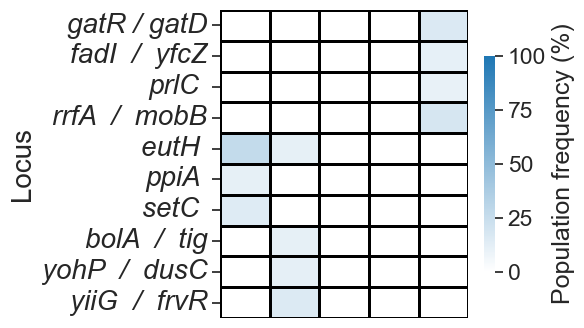

In [17]:
# Datos de frecuencias de mutaciones
data = {
    'gene': [
        'gatR / gatD', 
        'fadI  /  yfcZ', 
        'prlC ', 
        'rrfA  /  mobB', 
        'eutH ', 
        'ppiA ', 
        'setC ', 
        'bolA  /  tig', 
        'yohP  /  dusC', 
        'yiiG  /  frvR'
    ],
    'mono_iso_1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'mono_iso_2': [16.1, 11.2, 10.2, 18.4, 0, 0, 0, 0, 0, 0],
    'mono_iso_3': [0, 0, 0, 0, 11.4, 0, 0, 11.4, 11.8, 15.8],
    'mono_iso_4': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'mono_iso_5': [0, 0, 0, 0, 26.6, 11.4, 14.5, 0, 0, 0]
}


# Crear el DataFrame
df = pd.DataFrame(data)

# Calcular la matriz de correlación
corr_matrix = df.drop(columns='gene').corr()

# Reorganizar las columnas del DataFrame basado en la matriz de correlación
ordered_columns = corr_matrix.sum().sort_values(ascending=False).index
df_ordered = df[['gene'] + list(ordered_columns)]

# Crear una paleta personalizada que tenga blanco en el valor 0 y azul para los valores altos
cmap = mcolors.LinearSegmentedColormap.from_list(
    "white_to_blue", ["white", "#1f77b4"], N=256
)

# Establecer estilo y escala de fuentes
sns.set(font_scale=1.5, style='ticks')

# Crear el heatmap con la paleta personalizada
plt.figure(figsize=(4, 4))
ax = plt.axes()
sns.heatmap(df_ordered.set_index('gene'), cmap=cmap, cbar=True, linecolor='black', linewidths=1,
            cbar_kws={'label': 'Population frequency (%)', 'orientation': 'vertical', 'ticks': [0, 25, 50, 75, 100], 'shrink': 0.7},
            annot=False, vmin=0, vmax=100, ax=ax)

# Ajustar etiquetas de los ejes
ax.set_xlabel("")
ax.set_ylabel("Locus", fontsize=20)

ax.xaxis.set_ticks([])
ax.tick_params(axis='y', labelsize=20)

# Establecer estilo en cursiva para las etiquetas del eje y
for tick in ax.get_yticklabels():
    tick.set_fontstyle('italic')

plt.show()


#### c) Genes with mutations in replicates from M monocultures

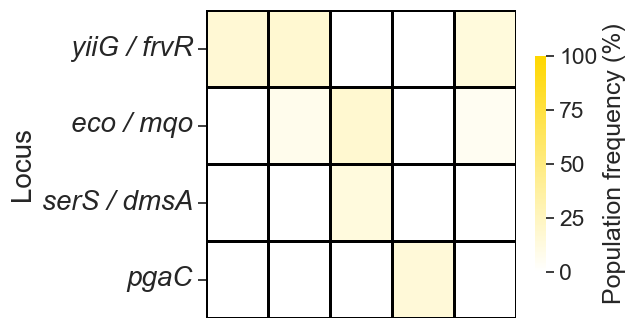

In [18]:

# Datos de frecuencias de mutaciones
data = {
    'gene': [
        'yiiG / frvR', 
        'eco / mqo', 
        'serS / dmsA', 
        'pgaC'
    ],
    18: [17.0, 0, 0, 0],
    19: [18.0, 7.8, 0, 0],
    20: [0, 18.4, 13.6, 0],
    21: [0, 0, 0, 15.5],
    22: [13.9, 5.4, 0, 0]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Crear una paleta personalizada que vaya de blanco a amarillo oscuro
cmap = mcolors.LinearSegmentedColormap.from_list(
    "white_to_dark_yellow", ["white", "#FFD700"], N=256
)

# Establecer estilo y escala de fuentes
sns.set(font_scale=1.5, style='ticks')

# Crear el heatmap con la paleta personalizada
plt.figure(figsize=(5, 4))
ax = plt.axes()
sns.heatmap(df.set_index('gene'), cmap=cmap, cbar=True, linecolor='black', linewidths=1,
            cbar_kws={'label': 'Population frequency (%)', 'orientation': 'vertical', 'ticks': [0, 25, 50, 75, 100], 'shrink': 0.7},
            annot=False, vmin=0, vmax=100, ax=ax)

# Ajustar etiquetas de los ejes
ax.set_xlabel("")
ax.set_ylabel("Locus", fontsize=20)

ax.xaxis.set_ticks([])
ax.tick_params(axis='y', labelsize=20)

# Establecer estilo en cursiva para las etiquetas del eje y
for tick in ax.get_yticklabels():
    tick.set_fontstyle('italic')

plt.show()


# Figure S8. Mutations in metabolic genes can bypass isoleucine auxotrophy and restore growth to varying degrees in the absence of amino acids

In [19]:
# Define normalization function
def normalize(row, blank_wells):
    blank = row[blank_wells].mean()  # Ensure the blank wells exist
    row = (row - blank).clip(lower=1e-4)  # Subtract and clip values
    return row

# Define function to parse P1.xlsx
def parse_od_1(Location_1, blank_wells):
    od = pd.read_excel(Location_1, skiprows=28, nrows=432)
    od.drop(['T° 600', 'Time', 'Unnamed: 0'], axis=1, inplace=True)
    od = od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"] = np.arange(0, len(od)) * 10 / 60  # Create a new Time column
    return od

# Define function to parse P2.xlsx
def parse_od_2(Location_2, blank_wells):
    od = pd.read_excel(Location_2, skiprows=28, nrows=432)
    od.drop(['T° 600', 'Time', 'Unnamed: 0'], axis=1, inplace=True)
    od = od.apply(lambda r: normalize(r, blank_wells), axis=1)
    od["Time"] = np.arange(0, len(od)) * 10 / 60
    return od

# Define the blank wells
blank_wells = ['B1', 'B2', 'B3']

base_directory_2 = os.path.join(os.getcwd(), "Data_R", "Growth curves mutants")  # This will create a relative path to the "Data" folder

# Now the file paths are relative to the current working directory
Location_1 = os.path.join(base_directory_2, "P1.xlsx")
Location_2 = os.path.join(base_directory_2, "P2.xlsx")

# Load and process the Excel files
od_1 = parse_od_1(Location_1, blank_wells)
od_2 = parse_od_2(Location_2, blank_wells)

In [20]:
location_key = os.path.join(base_directory_2, "key_exp_R.xlsx")

# Load the Google Sheet file into a pandas DataFrame
tmp = pd.read_excel(location_key, sheet_name='Plate 1')
tmp['plate'] = 'P1'

tmp2 = pd.read_excel(location_key, sheet_name='plate 2')
tmp2['plate'] = 'P2'
metadata = pd.concat((tmp, tmp2), ignore_index=True)

print(metadata)

   Well name  Plate  AA     stress Population plate
0         A1      1   0  no stress         WT    P1
1         A2      1   0  no stress         WT    P1
2         A3      1   0  no stress         WT    P1
3         B1      1   0  no stress     medium    P1
4         B2      1   0  no stress     medium    P1
..       ...    ...  ..        ...        ...   ...
57        G4      1   0  no stress        NaN    P2
58        H1      1   0  no stress       E7_3    P2
59        H2      1   0  no stress       E7_3    P2
60        H3      1   0  no stress       E7_3    P2
61        H4      1   0  no stress        NaN    P2

[62 rows x 6 columns]


In [21]:
## smooth curves
w = 8 #size of smoothing window
od_ss = od_1.copy()
od_ss = od_1.rolling(window=w, center=True, axis=0).mean()
od_ss['Time'] = od_1['Time'] 

od_ps = od_2.copy()
od_ps = od_2.rolling(window=w, center=True, axis=0).mean()
od_ps['Time'] = od_2['Time'] 

ods = {'P1': od_ss, 'P2':od_ps}

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/3652352999.py:4: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_ss = od_1.rolling(window=w, center=True, axis=0).mean()
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/3652352999.py:8: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  od_ps = od_2.rolling(window=w, center=True, axis=0).mean()


In [22]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/ignaciojosemelerojimenez/Library/Python/3.11/lib/python/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['axes', 'product', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


#### Figure S8. a) Growth curves of different isolates in media without amino acid supplementation and without stress. In each panel, three different isolates from an independently derived population are shown, together with the prototrophic strain (grey), and the ΔI ancestor (blue). The data are presented as the mean ± SD of 3 replicates per strain 

##### Salinity-derived

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/1233812014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["Time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/1233812014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["Time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/1233812014.py:3: FutureWarning: The default of obse

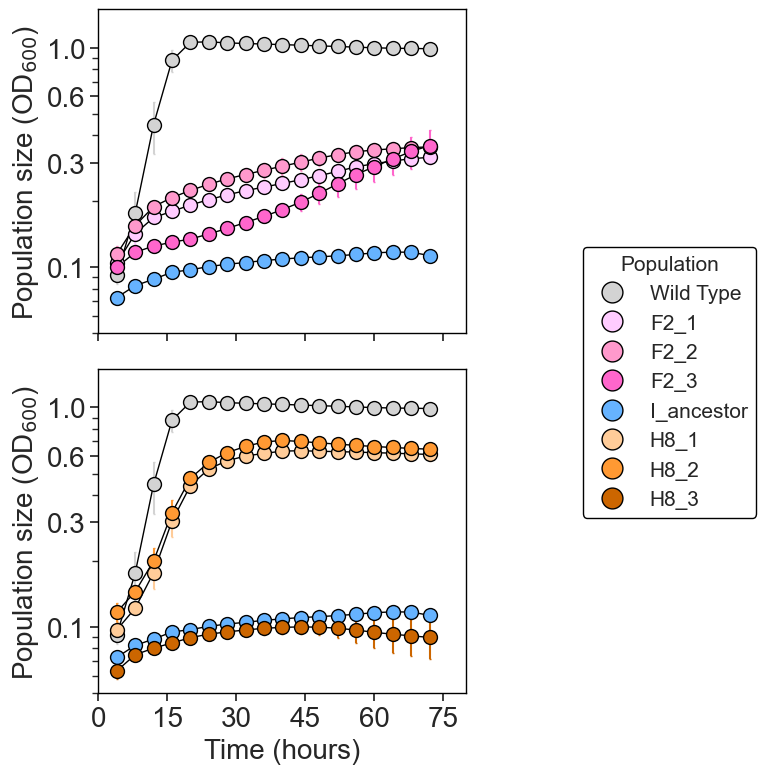

In [23]:
# Define a function to plot points with error bars every 30 minutes
def plot_with_errorbars(data, **kwargs):
    sub_data = data.groupby(pd.cut(data["Time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
    sub_data.reset_index(inplace=True)
    sub_data['interval_right'] = sub_data['Time'].apply(lambda x: x.right)
    
    ax = plt.gca()
    ax.errorbar(sub_data['interval_right'], sub_data['mean_OD'], yerr=sub_data['std_OD'], fmt='o', capsize=1, 
                color=kwargs['color'], alpha=1, markeredgecolor='black', markersize=10)
    ax.plot(sub_data['interval_right'], sub_data['mean_OD'], marker='o', linestyle='-', markersize=8, 
            color='black', linewidth=1)
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel("OD")
    ax.set_yscale('log')
    ax.set_xlim(0, 80)

# Create long-form data for plotting
od_ss_long = od_ss.melt(id_vars='Time', var_name='Well', value_name='OD')

# Define a mapping from population numbers to their names using plot_info
population_names = {
    'WT': 'WT',
    'F2_1': 'F2_1',
    'F2_2': 'F2_2',
    'F2_3': 'F2_3',
    'H8_1': 'H8_1',
    'H8_2': 'H8_2',
    'H8_3': 'H8_3',
    'I_ancestor': 'I_ancestor',
    'medium': 'medium',
}

# Merge long-form OD data with metadata based on the well names
ldata_all = pd.merge(od_ss_long, metadata, left_on='Well', right_on='Well name')

# Map the population names to the 'Population' column
ldata_all['Population'] = ldata_all['Population'].map(population_names)

# Create a custom color palette for the populations using plot_info
plot_info = {
    'WT': {'color': 'lightgray', 'label': 'Wild Type'},
    'F2_1': {'color': '#ffccff', 'label': 'F2_1'},
    'F2_2': {'color': '#ff99cc', 'label': 'F2_2'},
    'F2_3': {'color': '#ff66cc', 'label': 'F2_3'},
    'I_ancestor': {'color': '#66b3ff', 'label': 'I_ancestor'},
    'H8_1': {'color': '#ffcc99', 'label': 'H8_1'},
    'H8_2': {'color': '#ff9933', 'label': 'H8_2'},
    'H8_3': {'color': '#cc6600', 'label': 'H8_3'}
}

# Map colors to the ldata_all DataFrame
ldata_all['color'] = ldata_all['Population'].map(lambda x: plot_info[x]['color'] if x in plot_info else 'black')

# Define the stress levels for the columns
stress_levels = ['control', 'salinity', 'PNP']

# Create a combined population order for two rows
population_order = ['WT', 'I_ancestor', 'F2_1', 'F2_2', 'F2_3', 'medium', 'H8_1', 'H8_2', 'H8_3']

# Create a mapping for the two rows
row_mapping = {
    'Row 1': ['WT', 'I_ancestor', 'F2_1', 'F2_2', 'F2_3'],
    'Row 2': ['WT', 'I_ancestor', 'H8_1', 'H8_2', 'H8_3'],
}

# 1. Duplicate the rows corresponding to WT and I_ancestor
wt_and_ancestor = ldata_all[ldata_all['Population'].isin(['WT', 'I_ancestor'])].copy()

# 2. Assign 'Row 2' to the duplicated copies
wt_and_ancestor['Row'] = 'Row 2'

# 3. Assign 'Row 1' to the original WT and I_ancestor
ldata_all['Row'] = ldata_all['Population'].apply(
    lambda x: 'Row 1' if x in ['WT', 'I_ancestor'] else None
)

# 4. Assign other populations to Row 1 and Row 2 based on the original mapping
ldata_all['Row'] = ldata_all.apply(
    lambda row: 'Row 1' if row['Population'] in row_mapping['Row 1'] else 'Row 2' if row['Population'] in row_mapping['Row 2'] else row['Row'],
    axis=1
)

# 5. Concatenate the original DataFrame with the duplicated WT and I_ancestor rows
ldata_all = pd.concat([ldata_all, wt_and_ancestor], ignore_index=True)

# Filter only the rows corresponding to the "no stress" condition
ldata_no_stress = ldata_all[ldata_all['stress'] == 'no stress']

# Create a FacetGrid for the growth curves under the "no stress" condition
g = sns.FacetGrid(
    ldata_no_stress.dropna(subset=['Row']), 
    row='Row', hue='Population', 
    palette={key: info['color'] for key, info in plot_info.items()}, 
    margin_titles=True, height=4, aspect=1.5  # Adjusted height and aspect for a square plot
)

# Map the function to plot with error bars onto the FacetGrid
g.map_dataframe(plot_with_errorbars)

# Configure axis titles and general adjustments
g.set_titles(row_template="", col_template="", size=20)  # Remove column titles
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)", fontsize=20)  # X-axis label
    ax.set_ylabel("Population size (OD$_{600}$)", fontsize=20)  # Y-axis label
    ax.set_yscale('log')  # Logarithmic scale for y-axis
    ax.set_ylim(bottom=0.05, top=1.5)  # Y-axis limits
    ax.set_yticks([0.1, 0.3, 0.6, 1])  # Custom y-axis ticks
    ax.yaxis.set_major_formatter(ScalarFormatter())  # Format y-axis ticks
    ax.tick_params(axis='both', which='major', labelsize=20)  # Tick size
    ax.set_xticks([0, 15, 30, 45, 60, 75])  # Custom x-axis ticks

    # Add borders to the plots
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

# Manually create the legend (excluding the "medium" population)
legend_labels = [info['label'] for key, info in plot_info.items() if key != 'medium']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=info['color'], 
               markeredgewidth=1, markeredgecolor='black', markersize=15) 
    for key, info in plot_info.items() if key != 'medium'
]

# Add the legend outside the plot, further from the graph
g.fig.subplots_adjust(right=0.8)  # Adjust space for the legend
g.fig.legend(
    handles=legend_handles, labels=legend_labels, loc='center right', 
    title="Population", fontsize=15, title_fontsize=15, 
    frameon=True, framealpha=1, edgecolor='black', bbox_to_anchor=(1.3, 0.5)  # Move legend further
)

plt.show()

##### PNP-derived

/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/1233812014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["Time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/1233812014.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub_data = data.groupby(pd.cut(data["Time"], bins=np.arange(0, 73, 4))).agg(mean_OD=("OD", "mean"), std_OD=("OD", "std"))
/var/folders/8k/2pmhrxh13kj4lgq14007hkcm0000gn/T/ipykernel_20422/1233812014.py:3: FutureWarning: The default of obse

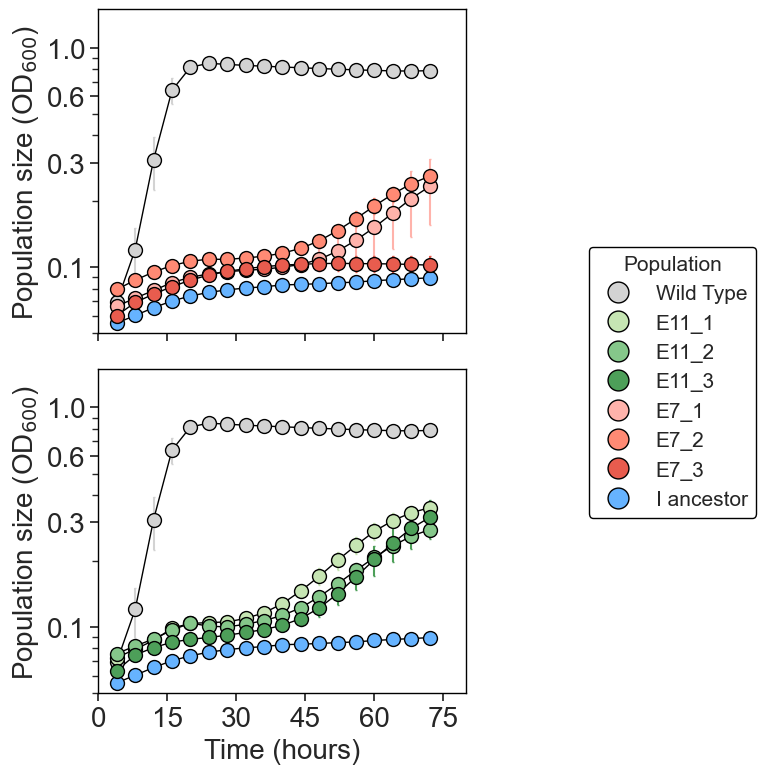

In [24]:
od_ss_long = od_ps.melt(id_vars='Time', var_name='Well', value_name='OD')
ldata_all = pd.merge(od_ss_long, metadata, left_on='Well', right_on='Well name')


# Define a mapping from population numbers to their names using plot_info
population_names = {
    'WT': 'WT',
    'E7_1': 'E7_1',
    'E7_2': 'E7_2',
    'E7_3': 'E7_3',
    'E11_1': 'E11_1',
    'E11_2': 'E11_2',
    'E11_3': 'E11_3',
    'I_ancestor': 'I_ancestor',
    'medium': 'medium',
}

# Merge long-form OD data with metadata based on the well names
ldata_all = pd.merge(od_ss_long, metadata, left_on='Well', right_on='Well name')

# Map the population names to the 'Population' column
ldata_all['Population'] = ldata_all['Population'].map(population_names)

# Create a custom color palette for the populations using plot_info
plot_info = {
    'WT': {'color': 'lightgray', 'label': 'Wild Type'},
    'E11_1': {'color': '#c6e5b3', 'label': 'E11_1'},  # Light green
    'E11_2': {'color': '#85c78a', 'label': 'E11_2'},  # Medium green
    'E11_3': {'color': '#4d9f59', 'label': 'E11_3'},  # Dark green
    'E7_1': {'color': '#ffb3ab', 'label': 'E7_1'},    # Light coral
    'E7_2': {'color': '#ff8a74', 'label': 'E7_2'},    # Medium coral
    'E7_3': {'color': '#e85c4e', 'label': 'E7_3'},    # Dark coral
    'I_ancestor': {'color': '#66b3ff', 'label': 'I ancestor'},  # Light blue
    'medium': {'color': 'lightgray', 'label': 'Medium Control'}
}



# Map colors to the ldata_all DataFrame
ldata_all['color'] = ldata_all['Population'].map(lambda x: plot_info[x]['color'] if x in plot_info else 'black')

# Define the stress levels for the columns
stress_levels = ['control', 'salinity', 'PNP']

# Create a combined population order for two rows
population_order = ['WT', 'I_ancestor', 'E7_1', 'E7_2', 'E7_3', 'medium', 'E11_1', 'E11_2', 'E11_3']

# Create a mapping for the two rows
row_mapping = {
    'Row 1': ['WT', 'I_ancestor', 'E7_1', 'E7_2', 'E7_3'],
    'Row 2': ['WT', 'I_ancestor', 'E11_1', 'E11_2', 'E11_3'],
}

# 1. Duplicate the rows corresponding to WT and I_ancestor
wt_and_ancestor = ldata_all[ldata_all['Population'].isin(['WT', 'I_ancestor'])].copy()

# 2. Assign 'Row 2' to the duplicated copies
wt_and_ancestor['Row'] = 'Row 2'

# 3. Assign 'Row 1' to the original WT and I_ancestor
ldata_all['Row'] = ldata_all['Population'].apply(
    lambda x: 'Row 1' if x in ['WT', 'I_ancestor'] else None
)

# 4. Assign other populations to Row 1 and Row 2 based on the original mapping
ldata_all['Row'] = ldata_all.apply(
    lambda row: 'Row 1' if row['Population'] in row_mapping['Row 1'] else 'Row 2' if row['Population'] in row_mapping['Row 2'] else row['Row'],
    axis=1
)

# 5. Concatenate the original DataFrame with the duplicated WT and I_ancestor rows
ldata_all = pd.concat([ldata_all, wt_and_ancestor], ignore_index=True)

# Filter for the "no stress" condition
ldata_no_stress = ldata_all[ldata_all['stress'] == 'no stress']



# Create a FacetGrid for the growth curves under the "no stress" condition
g = sns.FacetGrid(
    ldata_no_stress.dropna(subset=['Row']), 
    row='Row', hue='Population', 
    palette={key: info['color'] for key, info in plot_info.items()}, 
    margin_titles=True, height=4, aspect=1.5  # Adjusted height and aspect for a square plot
)

# Map the function to plot with error bars onto the FacetGrid
g.map_dataframe(plot_with_errorbars)

# Configure axis titles and general adjustments
g.set_titles(row_template="", col_template="", size=20)  # Remove column titles
for ax in g.axes.flat:
    ax.set_xlabel("Time (hours)", fontsize=20)  # X-axis label
    ax.set_ylabel("Population size (OD$_{600}$)", fontsize=20)  # Y-axis label
    ax.set_yscale('log')  # Logarithmic scale for y-axis
    ax.set_ylim(bottom=0.05, top=1.5)  # Y-axis limits
    ax.set_yticks([0.1, 0.3, 0.6, 1])  # Custom y-axis ticks
    ax.yaxis.set_major_formatter(ScalarFormatter())  # Format y-axis ticks
    ax.tick_params(axis='both', which='major', labelsize=20)  # Tick size
    ax.set_xticks([0, 15, 30, 45, 60, 75])  # Custom x-axis ticks

    # Add borders to the plots
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

# Manually create the legend (excluding the "medium" population)
legend_labels = [info['label'] for key, info in plot_info.items() if key != 'medium']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=info['color'], 
               markeredgewidth=1, markeredgecolor='black', markersize=15) 
    for key, info in plot_info.items() if key != 'medium'
]

# Add the legend outside the plot, further from the graph
g.fig.subplots_adjust(right=0.8)  # Adjust space for the legend
g.fig.legend(
    handles=legend_handles, labels=legend_labels, loc='center right', 
    title="Population", fontsize=15, title_fontsize=15, 
    frameon=True, framealpha=1, edgecolor='black', bbox_to_anchor=(1.3, 0.5)  # Move legend further
)

plt.show()

### Figure S8. b) Loci with mutations present in at least two replicate populations or occurring at a frequency > 0.3 and c) Loci with mutations present at isolate level. Colors correspond to each isolate.

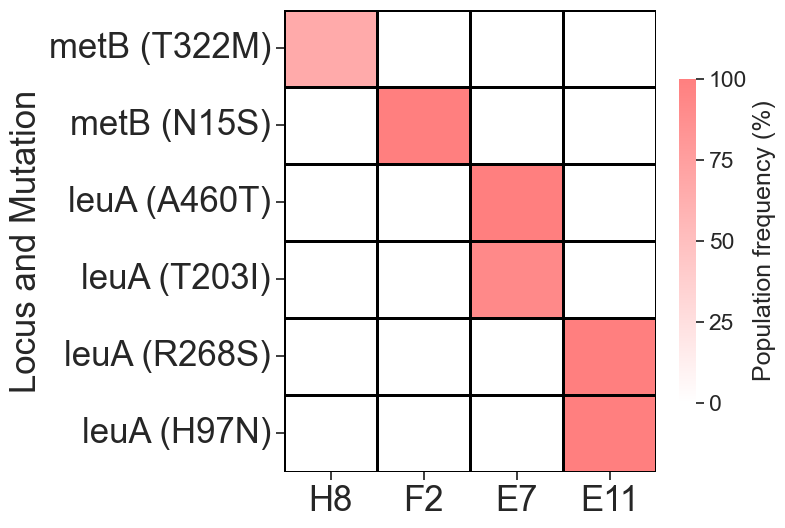

In [25]:
data_heatmap = {
    'mutant': [
        'metB (T322M)', 'metB (N15S)', 'leuA (A460T)', 
        'leuA (T203I)', 'leuA (R268S)', 'leuA (H97N)'
    ],
    'H8': [66.5, 0, 0, 0, 0, 0],
    'F2': [0, 100, 0, 0, 0, 0],
    'E7': [0, 0, 100, 91.8, 0, 0],
    'E11': [0, 0, 0, 0, 100, 100]
}

# Create the DataFrame
df_heatmap = pd.DataFrame(data_heatmap)

# Set the DataFrame index to the 'mutant' column
df_heatmap.set_index('mutant', inplace=True)

# Create a color palette in salmon (warm pink) shades
cmap = mcolors.LinearSegmentedColormap.from_list("salmon_scale", ["white", "#FF7F7F"], N=256)

# Set font scale and style
sns.set(font_scale=1.5, style='ticks')

# Create the heatmap with the salmon shades palette
plt.figure(figsize=(6, 6))
ax = plt.axes()
sns.heatmap(df_heatmap, cmap=cmap, annot=False, cbar=True, linecolor='black', linewidths=1,
            cbar_kws={'label': 'Population frequency (%)', 'orientation': 'vertical', 'ticks': [0, 25, 50, 75, 100], 'shrink': 0.7},
            vmin=0, vmax=100, ax=ax)

# Increase the size of the colorbar label
colorbar = ax.collections[0].colorbar
colorbar.set_label('Population frequency (%)', fontsize=18)  # Increased font size

# Adjust axis labels
ax.set_xlabel("")
ax.set_ylabel("Locus and Mutation", fontsize=25)

ax.tick_params(axis='y', labelsize=25)
ax.tick_params(axis='x', labelsize=25)

plt.show()



### Figure S8. c) Loci with mutations present at isolate level. Colors correspond to each isolate.

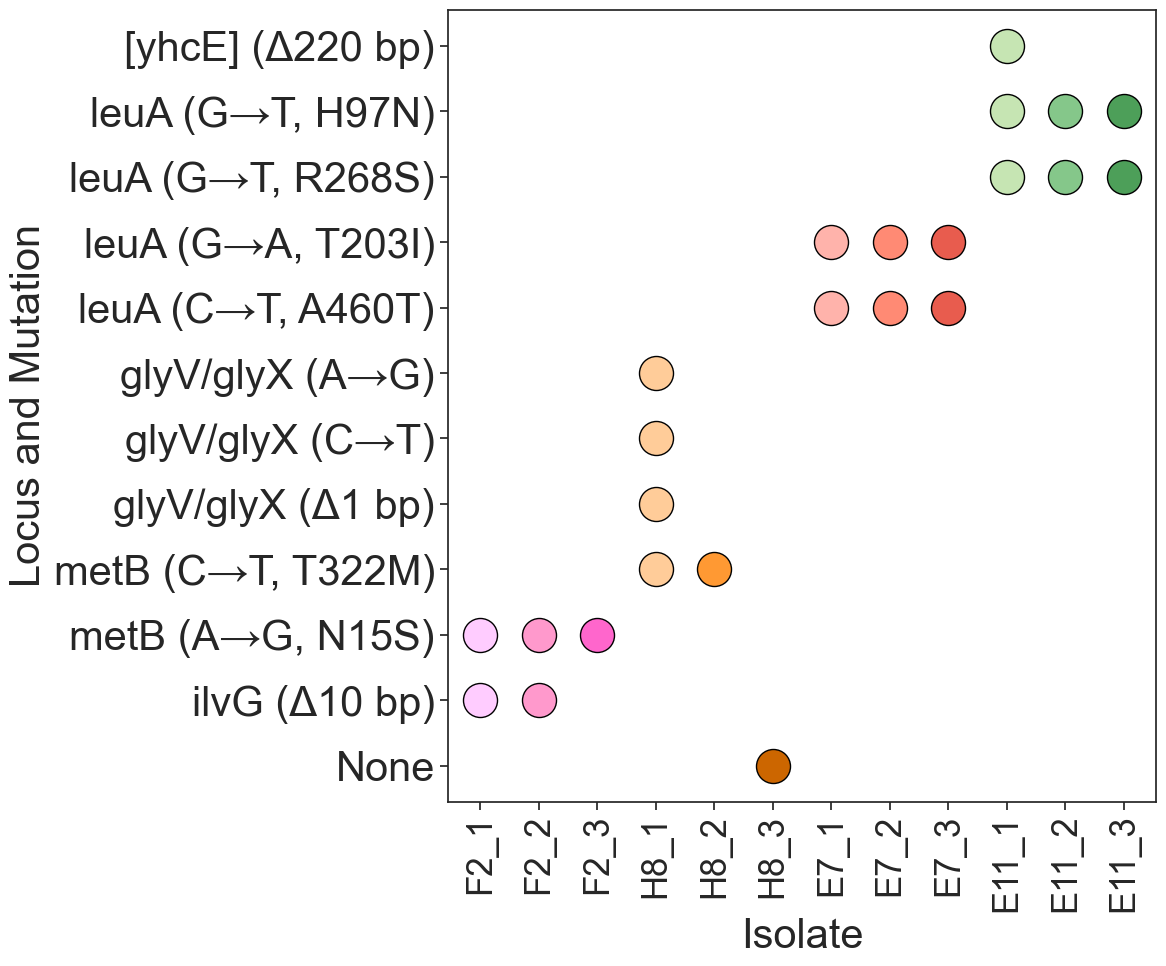

In [26]:
# Combined Data for both charts
mutations = [
    "None",  # Moved "None" to the beginning
    "ilvG (Δ10 bp)", 
    "metB (A→G, N15S)", 
    "metB (C→T, T322M)", 
    "glyV/glyX (Δ1 bp)", 
    "glyV/glyX (C→T)", 
    "glyV/glyX (A→G)", 
    "leuA (C→T, A460T)", 
    "leuA (G→A, T203I)", 
    "leuA (G→T, R268S)", 
    "leuA (G→T, H97N)", 
    "[yhcE] (Δ220 bp)"
]

populations = [
    ["H8_3"],  # None
    ["F2_1", "F2_2"],  # ilvG (Δ10 bp)
    ["F2_1", "F2_2", "F2_3"],  # metB (A→G, N15S)
    ["H8_1", "H8_2"],  # metB (C→T, T322M)
    ["H8_1"],  # glyV/glyX (Δ1 bp)
    ["H8_1"],  # glyV/glyX (C→T)
    ["H8_1"],  # glyV/glyX (A→G)
    ["E7_1", "E7_2", "E7_3"],  # leuA (C→T, A460T)
    ["E7_1", "E7_2", "E7_3"],  # leuA (G→A, T203I)
    ["E11_1", "E11_2", "E11_3"],  # leuA (G→T, R268S)
    ["E11_1", "E11_2", "E11_3"],  # leuA (G→T, H97N)
    ["E11_1"],  # [yhcE] (Δ220 bp)
]

# Combined Color Palette for populations
plot_info = {
    'F2_1': {'color': '#ffccff', 'label': 'F2_1'},
    'F2_2': {'color': '#ff99cc', 'label': 'F2_2'},
    'F2_3': {'color': '#ff66cc', 'label': 'F2_3'},
    'H8_1': {'color': '#ffcc99', 'label': 'H8_1'},
    'H8_2': {'color': '#ff9933', 'label': 'H8_2'},
    'H8_3': {'color': '#cc6600', 'label': 'H8_3'},
    'E7_1': {'color': '#ffb3ab', 'label': 'E7_1'},
    'E7_2': {'color': '#ff8a74', 'label': 'E7_2'},
    'E7_3': {'color': '#e85c4e', 'label': 'E7_3'},
    'E11_1': {'color': '#c6e5b3', 'label': 'E11_1'},
    'E11_2': {'color': '#85c78a', 'label': 'E11_2'},
    'E11_3': {'color': '#4d9f59', 'label': 'E11_3'},
}


# Update population positions to ensure E7 comes before E11
ordered_populations = [
    "F2_1", "F2_2", "F2_3", "H8_1", "H8_2", "H8_3",
    "E7_1", "E7_2", "E7_3",  # E7 first
    "E11_1", "E11_2", "E11_3"
]

# Map populations to x positions in the new order
population_positions = {pop: i for i, pop in enumerate(ordered_populations)}

# Create the scatterplot
fig, ax = plt.subplots(figsize=(12, 10))

for mutation_idx, pops in enumerate(populations):
    for pop in pops:
        x = population_positions[pop]
        y = mutation_idx
        ax.scatter(x, y, color=plot_info[pop]['color'], s=600, label=pop if mutation_idx == 0 else "", edgecolor='black')

# Customize the plot
ax.set_xticks(range(len(ordered_populations)))
ax.set_xticklabels([plot_info[pop]['label'] for pop in ordered_populations], rotation=90, fontsize=25)
ax.set_yticks(range(len(mutations)))
ax.set_yticklabels(mutations, fontsize=30)
ax.set_xlabel("Isolate", fontsize=30)
ax.set_ylabel("Locus and Mutation", fontsize=30)


plt.tight_layout()
plt.show()


